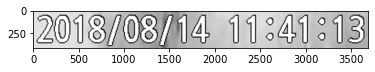

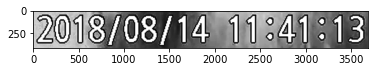

2018/08/14 11:41:13

 



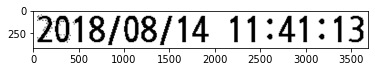

In [96]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import pytesseract
import numpy as np
pytesseract.pytesseract.tesseract_cmd=r'C:\\Program Files\\Tesseract-OCR\\tesseract'




#이미지 회색 변환
img =cv2.imread('whiteimg.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray')
plt.show()
#평활화 수행
convert = cv2.equalizeHist(img)
plt.imshow(convert,cmap='gray')
plt.show()

#이미지 확대 -skip

#흰색영역 내 노이즈 제거

kernel = np.ones((5,5))
convert = cv2.morphologyEx(convert,cv2.MORPH_CLOSE,kernel)




#흰색을 팽창 -> opencv 딜레이션 함수= 각 객체들의 픽셀을 팽창

convert = cv2.dilate(convert,kernel,iterations=2)

#캐니(Canny) 메소드() *찾아볼것!!!!!!!!!!!!!!!!!!!!!


#이진화
#bilateral 필터 적용
#색 반전




#img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow('dd',img)


cv2.imshow('cc',convert)
if cv2.waitKey(0) & 0xFF == 27:
    cv2.destroyAllWindows()
convert = cv2.threshold(convert, 220, 255, cv2.THRESH_BINARY_INV)[1]    
result=pytesseract.image_to_string(convert, config =  '-l eng --oem 3 --psm 4')

plt.imshow(convert,cmap='gray')
print(result)



In [52]:
import re


# \n 줄바꿈
# \x0c 폼피드
list3=['2018/08/14 11:40:41\n\x0c', '015 .00m\n\x0c', 'R : 16-08451\n\x0c', 'bm : 600 HP\n\x0c']
for c in list3:
    parse = re.sub('[\n\x0c]','',c)
    print(parse)
    
print()
    
list=['2018/08/14\n\x0c', '11:44:54\n\x0c', '044\n\x0c', '14m\n\x0c', '16-08451\n\x0c', '600\n\x0c', 'HP\n\x0c', '\x0c']

for c in list:
    parse = re.sub('[\n\x0c]','',c)
    print(parse)
    
list2= ['2018/08/14\n\x0c', 'O40.\n\x0c', '02\n\x0c', '11\n\x0c', '; 44 :\n\x0c', '28\n\x0c', '16-08451\n\x0c', '600\n\x0c', '\x0c', 'HP\n\x0c']
for c in list2:
    parse = re.sub('[\n\x0c]','',c)
    print(parse)
    

2018/08/14 11:40:41
015 .00m
R : 16-08451
bm : 600 HP

2018/08/14
11:44:54
044
14m
16-08451
600
HP

2018/08/14
O40.
02
11
; 44 :
28
16-08451
600

HP
